# Install electrical_test_analyzer

In [1]:
!pip install git+https://github.com/sunilrmair/electrical_test_analyzer.git

  Cloning https://github.com/sunilrmair/electrical_test_analyzer.git to /tmp/pip-req-build-1txr1d4y
  Running command git clone --filter=blob:none --quiet https://github.com/sunilrmair/electrical_test_analyzer.git /tmp/pip-req-build-1txr1d4y
  Resolved https://github.com/sunilrmair/electrical_test_analyzer.git to commit 9fb55e4c3896131ec5250aa78d816eead1dbcbe3
  Preparing metadata (setup.py) ... done


In [2]:
from datetime import datetime
import os

from google.colab import drive
import matplotlib.pyplot as plt

from electrical_test_analyzer import QueryManager
from electrical_test_analyzer import FilterSet

from electrical_test_analyzer import RawDataLoader, GITTAnalyzer, EISBasicAnalyzer, EISLoader, MetricAnalyzer
from electrical_test_analyzer import plot_df

# Specify locations for logs and data

This example is a google colab notebook accessing data on a google drive

In [3]:
# Mount drive, this may require permissions
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Specify file locations
NFC_shared_directory = '/content/drive/MyDrive/Na_fuel_cell_shared'

# Cell parameters log location
cell_parameters_manifest_filepath = os.path.join(NFC_shared_directory, 'Logs/cell_parameters_manifest.xlsx')

# Test parameters log location
test_manifest_filepath = os.path.join(NFC_shared_directory, 'Logs/test_logs/current_ladder_manifest.xlsx')

# Component log location
component_properties_manifest_filepath = os.path.join(NFC_shared_directory, 'Logs/component_properties_manifest.xlsx')

# Data directory
data_directory = os.path.join(NFC_shared_directory, 'EC-data')


In [5]:
# Specify date_title type directory for writing figures
title = 'eta_example'
today_date = datetime.today().strftime('%Y-%m-%d')

figure_output_directory = os.path.join(NFC_shared_directory, 'analysis_figures', '_'.join([today_date, title]))
os.makedirs(figure_output_directory, exist_ok=True)

# Filter down to relevant data using QueryManager and FilterSets

In [6]:
# Initialize query
qm = QueryManager(cell_parameters_manifest_filepath, test_manifest_filepath)

# Print current state of query
print(f'{qm.num_tests} tests selected')

# Filter by cell and test parameters
sample_names = ['NCC001AB-EC00-01']
samplename_filterset = FilterSet(isin_filters={'Sample name' : sample_names})

cell_types = ['Flow']
celltype_filterset = FilterSet(isin_filters={'Cell type' : cell_types})

# Add and apply filtersets
qm.add_filterset([samplename_filterset, celltype_filterset])
qm.apply_filtersets()

# Print current state of query
print(f'{qm.num_tests} tests selected')

22 tests selected
4 tests selected


In [7]:
# Search data directory to create query_df
query_df = qm.search(data_directory)

# Print query_df columns
print(query_df.columns)

Index(['index', 'Sample name', 'File specifier', 'Cell temperature (C)',
       'Bubbler type', 'Bubbler temperature (C)', 'Bubbler wt NaOH',
       'Gas type', 'Flow rate (mL/min)', 'Oven', 'Batch', 'Cell type',
       'Active area (cm2)', 'Cathode type', 'Cathode thickness (mm)',
       'Cathode geometry', 'Separator type', 'Separator thickness (mm)',
       'Anode type', 'Anode thickness (mm)', 'filepath'],
      dtype='object')


# RawDataLoader example

In [8]:
# Apply RawDataLoader
raw_output_df = RawDataLoader.analyze(query_df, usecols=['Time (s)', 'Capacity (mAh)', 'Voltage (V)', 'Frequency (Hz)'])

# Print columns
print(raw_output_df.columns)

Index(['index', 'Sample name', 'File specifier', 'Cell temperature (C)',
       'Bubbler type', 'Bubbler temperature (C)', 'Bubbler wt NaOH',
       'Gas type', 'Flow rate (mL/min)', 'Oven', 'Batch', 'Cell type',
       'Active area (cm2)', 'Cathode type', 'Cathode thickness (mm)',
       'Cathode geometry', 'Separator type', 'Separator thickness (mm)',
       'Anode type', 'Anode thickness (mm)', 'filepath', 'mode', 'Time (s)',
       'Voltage (V)', 'Frequency (Hz)', 'Capacity (mAh)', 'MODE',
       'Capacity (mAh/cm2)'],
      dtype='object')


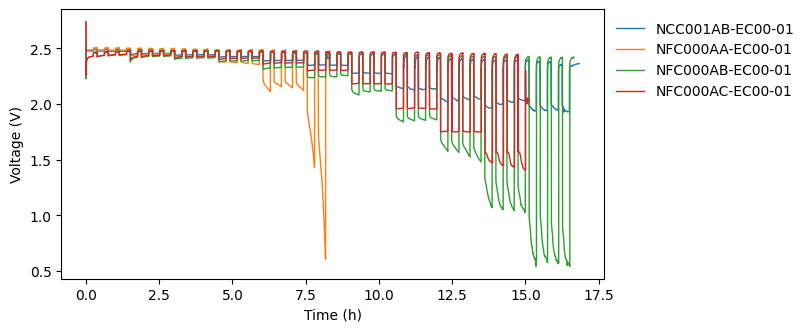

In [9]:
# Plot voltage-time trace

plot_kw = dict(lw=1) # ax.plot() keyword args: adjust line properties for all traces
subplots_kw = dict(figsize=[7, 3.5]) # plt.subplots() keyword args

x_key = 'Time (s)'
x_func = lambda x : x / 3600 # Convert to hours
y_key = 'Voltage (V)'

fig, ax = plot_df(raw_output_df, x_key, y_key, x_func=x_func, group_by='filepath', label_by='Sample name', plot_kw=plot_kw, subplots_kw=subplots_kw)
ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))

ax.set_xlabel('Time (h)')
ax.set_ylabel(y_key)

fig.savefig(os.path.join(figure_output_directory, 'time_voltage_traces.svg'), bbox_inches='tight')
plt.show()

# GITTAnalyzer example

In [10]:
# Apply GITTAnalyzer
gitt_output_df = GITTAnalyzer.analyze(query_df)

# Print columns
print(gitt_output_df.columns)

Index(['index', 'Sample name', 'File specifier', 'Cell temperature (C)',
       'Bubbler type', 'Bubbler temperature (C)', 'Bubbler wt NaOH',
       'Gas type', 'Flow rate (mL/min)', 'Oven', 'Batch', 'Cell type',
       'Active area (cm2)', 'Cathode type', 'Cathode thickness (mm)',
       'Cathode geometry', 'Separator type', 'Separator thickness (mm)',
       'Anode type', 'Anode thickness (mm)', 'filepath', 'Pulse count',
       'Polarize start time (h)', 'Polarize end time (h)',
       'Rest start time (h)', 'Rest end time (h)',
       'Polarize start capacity (mAh)', 'Polarize end capacity (mAh)',
       'Mean polarization current (mA)',
       'Standard deviation polarization current (mA)',
       'Median polarization current (mA)',
       'Mean last 10 polarization current points (mA)',
       'Mean polarization voltage (V)',
       'Standard deviation polarization voltage (V)',
       'Median polarization voltage (V)',
       'Mean last 10 polarization voltage points (V)', 'Mean

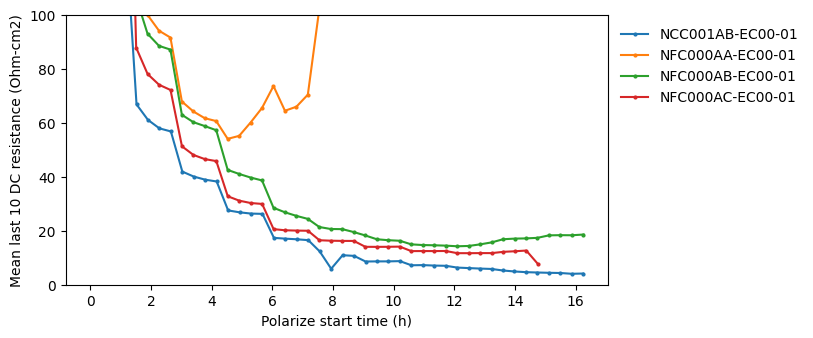

In [11]:
# Plot DC resistance vs time

plot_kw = dict(marker='o', markersize=2) # ax.plot() keyword args: adjust line properties for all traces
subplots_kw = dict(figsize=[7, 3.5]) # plt.subplots() keyword args

x_key = 'Polarize start time (h)'
y_key = 'Mean last 10 DC resistance (Ohm-cm2)'

fig, ax = plot_df(gitt_output_df, x_key, y_key, group_by='filepath', label_by='Sample name', plot_kw=plot_kw, subplots_kw=subplots_kw)
ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(0, 100)

ax.set_xlabel(x_key)
ax.set_ylabel(y_key)

fig.savefig(os.path.join(figure_output_directory, 'dc_resistance_vs_time.svg'), bbox_inches='tight')
plt.show()

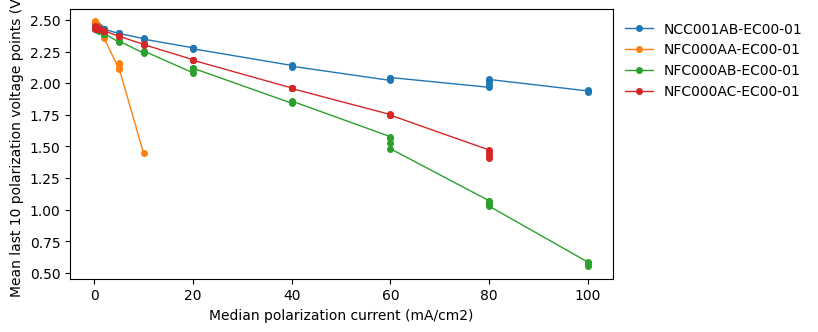

In [12]:
# Plot IV characteristics

plot_kw = dict(marker='o', markersize=4, lw=1) # ax.plot() keyword args: adjust line properties for all traces
subplots_kw = dict(figsize=[7, 3.5]) # plt.subplots() keyword args

x_key = 'Median polarization current (mA/cm2)'
x_func = lambda x : -x
y_key = 'Mean last 10 polarization voltage points (V)'

fig, ax = plot_df(gitt_output_df, x_key, y_key, x_func=x_func, group_by='filepath', label_by='Sample name', plot_kw=plot_kw, subplots_kw=subplots_kw)
ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))

ax.set_xlabel(x_key)
ax.set_ylabel(y_key)

fig.savefig(os.path.join(figure_output_directory, 'iv_characteristics.svg'), bbox_inches='tight')
plt.show()

# EISBasicAnalyzer example

In [13]:
# Apply EISBasicAnalyzer
eis_basic_output_df = EISBasicAnalyzer.analyze(query_df)

# Print columns
print(eis_basic_output_df.columns)

Index(['index', 'Sample name', 'File specifier', 'Cell temperature (C)',
       'Bubbler type', 'Bubbler temperature (C)', 'Bubbler wt NaOH',
       'Gas type', 'Flow rate (mL/min)', 'Oven', 'Batch', 'Cell type',
       'Active area (cm2)', 'Cathode type', 'Cathode thickness (mm)',
       'Cathode geometry', 'Separator type', 'Separator thickness (mm)',
       'Anode type', 'Anode thickness (mm)', 'filepath', 'Scan count',
       'Scan start time (h)', 'Scan start capacity (mAh)',
       'Minimum Re Z in first quadrant (Ohm)', 'Scan start capacity (mAh/cm2)',
       'Minimum Re Z in first quadrant (Ohm-cm2)'],
      dtype='object')


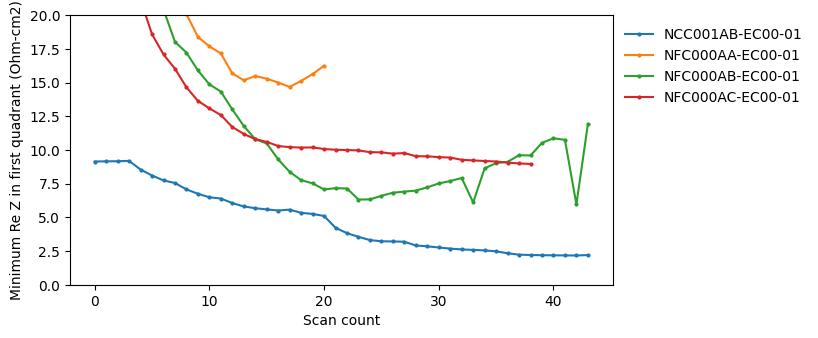

In [14]:
# Plot minimum Re(Z) in first quadrant

plot_kw = dict(marker='o', markersize=2) # ax.plot() keyword args: adjust line properties for all traces
subplots_kw = dict(figsize=[7, 3.5]) # plt.subplots() keyword args

x_key = 'Scan count'
y_key = 'Minimum Re Z in first quadrant (Ohm-cm2)'

fig, ax = plot_df(eis_basic_output_df, x_key, y_key, group_by='filepath', label_by='Sample name', plot_kw=plot_kw, subplots_kw=subplots_kw)
ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(0, 20)

ax.set_xlabel(x_key)
ax.set_ylabel(y_key)

fig.savefig(os.path.join(figure_output_directory, 'eis_r0.svg'), bbox_inches='tight')
plt.show()

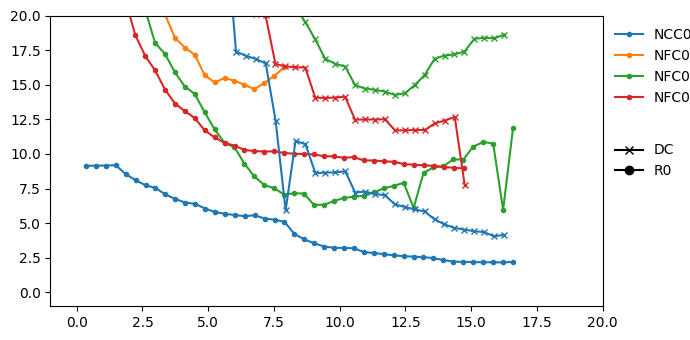

In [15]:
# Plot EIS R0 alongside GITT DC resistance

# Plot EIS R0
eis_plot_kw = dict(marker='o', markersize=3) # ax.plot() keyword args: adjust line properties for all traces
subplots_kw = dict(figsize=[7, 3.5], tight_layout=True) # plt.subplots() keyword args

eis_x_key = 'Scan start time (h)'
eis_y_key = 'Minimum Re Z in first quadrant (Ohm-cm2)'

fig, ax = plot_df(eis_basic_output_df, eis_x_key, eis_y_key, group_by='filepath', color_by='Sample name', label_by='Sample name', plot_kw=eis_plot_kw, subplots_kw=subplots_kw)

# Plot GITT DC resistance
gitt_plot_kw = dict(marker='x', markersize=5)
gitt_x_key = 'Polarize start time (h)'
gitt_y_key = 'Mean last 10 DC resistance (Ohm-cm2)'

fig, ax = plot_df(gitt_output_df, gitt_x_key, gitt_y_key, group_by='filepath', color_by='Sample name', plot_kw=gitt_plot_kw, ax=ax)

# Add custom legends
from matplotlib.lines import Line2D

# Typical sample legend
sample_legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
ax.add_artist(sample_legend) # When adding multiple legends, first one must be manually added or it will be overwritten

# EIS vs DC legend
handles = [
    Line2D([0], [0], marker='x', color='k', label='DC'),
    Line2D([0], [0], marker='o', color='k', label='R0')
]
ax.legend(handles=handles, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_xlim(-1, 20)
ax.set_ylim(-1, 20)


fig.savefig(os.path.join(figure_output_directory, 'eis_r0_and_dc_resistance.svg'), bbox_inches='tight')
plt.show()

# MetricAnalyzer example

In [16]:
specific_capacity = 1165.8

# Apply MetricAnalyzer
metric_output_df = MetricAnalyzer.analyze(query_df, specific_capacity, component_properties_manifest_filepath)

# Print columns
print(metric_output_df.columns)

Index(['index', 'Sample name', 'File specifier', 'Cell temperature (C)',
       'Bubbler type', 'Bubbler temperature (C)', 'Bubbler wt NaOH',
       'Gas type', 'Flow rate (mL/min)', 'Oven', 'Batch', 'Cell type',
       'Active area (cm2)', 'Cathode type', 'Cathode thickness (mm)',
       'Cathode geometry', 'Separator type', 'Separator thickness (mm)',
       'Anode type', 'Anode thickness (mm)', 'filepath', 'Total time (h)',
       'Total capacity (mAh)', 'Total energy (Wh)',
       'Polarize only total time (h)', 'Polarize only total capacity (mAh)',
       'Polarize only total energy (Wh)', 'Total capacity (mAh/cm2)',
       'Total energy (Wh/cm2)', 'Polarize only total capacity (mAh/cm2)',
       'Polarize only total energy (Wh/cm2)',
       'Inactive component areal density (g/cm2)',
       'Energy density active basis (Wh/kg)',
       'Energy density system basis (Wh/kg)',
       'Average power density active basis (W/kg)',
       'Average power density system basis (W/kg)',
   

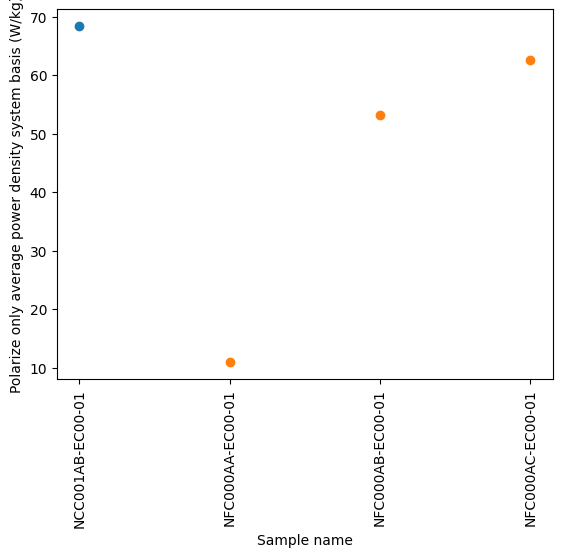

In [17]:
# Plot average power density counting only polarization segments

plot_kw = dict(marker='o')  # ax.plot() keyword args: adjust line properties for all traces

x_key = 'Sample name'
y_key = 'Polarize only average power density system basis (W/kg)'

fig, ax = plot_df(metric_output_df, x_key, y_key, group_by='filepath', color_by='Cell type', plot_kw=plot_kw)


ax.tick_params(axis='x', labelrotation=90) # Rotate labels
ax.set_xlabel(x_key)
ax.set_ylabel(y_key)

fig.savefig(os.path.join(figure_output_directory, 'average_power_densities.svg'), bbox_inches='tight')
plt.show()